# Multinominal Logistic Regression

In [34]:
import pickle
from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, ShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Load data

In [36]:
# Dataframe
path_df = "../Pickles/df.pickle"
with open(path_df, 'rb') as data:
    df = pickle.load(data)

# features_train
path_features_train = "../Pickles/X_train.pickle"
with open(path_features_train, 'rb') as data:
    features_train = pickle.load(data)

# labels_train
path_labels_train = "../Pickles/labels_train.pickle"
with open(path_labels_train, 'rb') as data:
    labels_train = pickle.load(data)

# features_test
path_features_test = "../Pickles/X_test.pickle"
with open(path_features_test, 'rb') as data:
    features_test = pickle.load(data)

# labels_test
path_labels_test = "../Pickles/labels_test.pickle"
with open(path_labels_test, 'rb') as data:
    labels_test = pickle.load(data)

## Vectorization with Count vectors

In [37]:
labels_train.replace(to_replace='topic',value=2,inplace=True)
labels_test.replace(to_replace='topic',value=2,inplace=True)
vectorizer = CountVectorizer()
vectorizer.fit(features_train)
features_train = vectorizer.transform(features_train)
features_test  = vectorizer.transform(features_test)

## Hyperparameter tuning with cross-validation

In [38]:
classifier = LogisticRegression(random_state = 8)

print('Parameters currently in use:\n')
pprint(classifier.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 8,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


## Hyperparameter tuning with Randomized Search Cross Validatio

In [39]:
C = [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['newton-cg', 'sag', 'saga', 'lbfgs']
class_weight = ['balanced', None]
penalty = ['l2']
random_parameters = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

pprint(random_parameters)

{'C': [0.1,
       0.2,
       0.30000000000000004,
       0.4,
       0.5,
       0.6,
       0.7000000000000001,
       0.8,
       0.9,
       1.0],
 'class_weight': ['balanced', None],
 'multi_class': ['multinomial'],
 'penalty': ['l2'],
 'solver': ['newton-cg', 'sag', 'saga', 'lbfgs']}


In [41]:
classifier = LogisticRegression(random_state=8)

random_search = RandomizedSearchCV(estimator=classifier,
                                   param_distributions=random_parameters,
                                   n_iter=1,
                                   scoring='accuracy',
                                   cv=3, 
                                   n_jobs=6,
                                   verbose=1, 
                                   random_state=8)


random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(random_state=8), n_iter=1,
                   n_jobs=6,
                   param_distributions={'C': [0.1, 0.2, 0.30000000000000004,
                                              0.4, 0.5, 0.6, 0.7000000000000001,
                                              0.8, 0.9, 1.0],
                                        'class_weight': ['balanced', None],
                                        'multi_class': ['multinomial'],
                                        'penalty': ['l2'],
                                        'solver': ['newton-cg', 'sag', 'saga',
                                                   'lbfgs']},
                   random_state=8, scoring='accuracy', verbose=1)

Let see the result of Hyperparameter tuning

In [ ]:
print("The best hyperparameters after Random Search cross-validation are:")
pprint(random_search.best_params_)
print("The accuracy of a model is:")
print(random_search.best_score_)

# Grid search cross validation

In [44]:
C = [float(x) for x in np.linspace(start = 0.6, stop = 1, num = 10)]
multi_class = ['multinomial']
solver = ['saga']
class_weight = [None]
penalty = ['l2']

param_grid = {'C': C,
               'multi_class': multi_class,
               'solver': solver,
               'class_weight': class_weight,
               'penalty': penalty}

classifier = LogisticRegression(random_state=8)

cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

grid_search = GridSearchCV(estimator=classifier, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           n_jobs = 6,
                           verbose=1)

grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


c:\users\georgivankov\desktop\ai\text mining\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             estimator=LogisticRegression(random_state=8), n_jobs=6,
             param_grid={'C': [0.6, 0.6444444444444444, 0.6888888888888889,
                               0.7333333333333333, 0.7777777777777778,
                               0.8222222222222222, 0.8666666666666667,
                               0.9111111111111111, 0.9555555555555555, 1.0],
                         'class_weight': [None], 'multi_class': ['multinomial'],
                         'penalty': ['l2'], 'solver': ['saga']},
             scoring='accuracy', verbose=1)

In [45]:
print("The best hyperparameters after Random Search cross-validation are:")
pprint(grid_search.best_params_)
print("The accuracy of a model is:")
print(grid_search.best_score_)

The best hyperparameters after Random Search cross-validation are:
{'C': 0.6,
 'class_weight': None,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'saga'}
The accuracy of a model is:
0.8715911531028558


In [46]:
best_classifier = grid_search.best_estimator_
best_classifier

LogisticRegression(C=0.6, multi_class='multinomial', random_state=8,
                   solver='saga')

## Model training and evaluation

In [47]:
best_classifier.fit(features_train, labels_train)

c:\users\georgivankov\desktop\ai\text mining\venv\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=0.6, multi_class='multinomial', random_state=8,
                   solver='saga')

In [48]:
predictions = best_classifier.predict(features_test)

In [49]:
# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, best_classifier.predict(features_train)))

The training accuracy is: 
0.9110622918290695


In [50]:
# Test accuracy
predictions = best_classifier.predict(features_test)
print("The test accuracy is: ")
print(accuracy_score(labels_test, predictions))

The test accuracy is: 
0.8735119047619048


In [51]:
# Classification report
print("Classification report")
print(classification_report(labels_test,predictions))

Classification report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       561
           1       0.90      0.84      0.87       441
           2       0.80      0.73      0.76       712
           3       0.87      0.87      0.87       750
           4       0.97      0.96      0.96      1131
           5       0.85      0.85      0.85       961
           6       0.92      0.95      0.94       753
           7       0.80      0.85      0.83       739

    accuracy                           0.87      6048
   macro avg       0.87      0.87      0.87      6048
weighted avg       0.87      0.87      0.87      6048



## Confusion matrix
Create confusion matrix to visualize what are the errors of algorithum

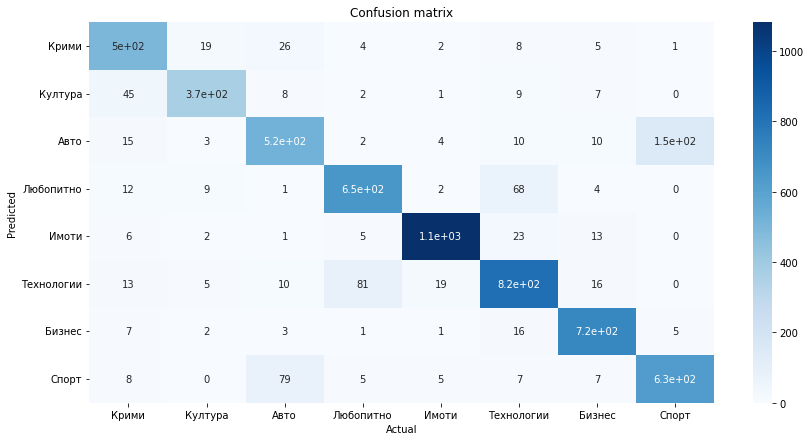

In [52]:
conf_matrix = confusion_matrix(labels_test, predictions)
plt.figure(figsize=(14,7))
plt.title('Confusion matrix')

sns.heatmap(
    conf_matrix, 
    xticklabels=df['topic'].unique(), 
    yticklabels=df['topic'].unique(),
    cmap="Blues",
    annot=True,
)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()